# EDA ON FIFA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly as py
import cufflinks as cf

In [5]:
from plotly.offline import iplot


In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
world_cups=pd.read_csv('Dataset/worldCups.csv')
players=pd.read_csv('Dataset/worldCupPlayers.csv')
matches=pd.read_csv('Dataset/worldCupMatches.csv')

In [6]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [8]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [9]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
matches.info(),players.info(),world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

(None, None, None)

In [20]:
world_cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [21]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [17]:
world_cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [19]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

## Data Cleaning


In [10]:
matches.dropna(subset=['Year'],inplace=True)
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [11]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [12]:
namesTeam = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
namesTeam

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [13]:
namesTeam.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [14]:
wrongName=list(namesTeam.index)
wrongName

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [15]:
correctName = [namesTeam.split('>')[1] for namesTeam in wrongName]
correctName

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [16]:
oldName = ['Germany FR','Maracan� - Est�dio Jornalista M�rio Filho','Estadio do Maracana']
newName = ['Germany','Maracana Stadium','Maracana Stadium']

In [17]:
wrongName = wrongName + oldName
correctName = correctName + newName

In [18]:
wrongName

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [19]:
correctName

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Germany',
 'Maracana Stadium',
 'Maracana Stadium']

In [20]:
for index ,wr in enumerate(wrongName):
    world_cups = world_cups.replace (wrongName[index],correctName[index])
    
for index ,wr in enumerate(wrongName):
    matches = matches.replace (wrongName[index],correctName[index])

for index ,wr in enumerate(wrongName):
    players = players.replace (wrongName[index],correctName[index])

In [21]:
namesTeam = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
namesTeam

Series([], Name: Home Team Name, dtype: int64)

In [30]:
d1= world_cups['Year']
d2= world_cups['GoalsScored']
# avg=d2.mean()
numGoals = pd.concat([d1,d2],axis =1) 
numGoals


,Year,GoalsScored
0,1930,70
1,1934,70
2,1938,84
3,1950,88
4,1954,140
5,1958,126
6,1962,89
7,1966,89
8,1970,95
9,1974,97


#### Year of least goals : 1930, 1934

#### Year of most goals : 1998, 2014

## goal frequency by year

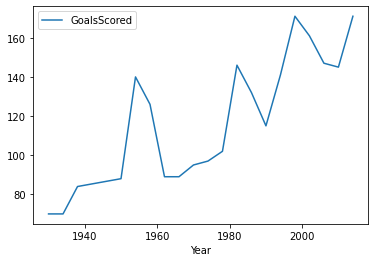

In [59]:
world_cups.plot(kind = "line",x="Year",y = "GoalsScored")
plt.show()

In [38]:
world_cups['GoalsScored'].max()

171

In [39]:
world_cups['GoalsScored'].min()

70

## Countries winner

In [22]:
winner= world_cups['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [23]:
runnerUp= world_cups['Runners-Up'].value_counts()
runnerUp

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [24]:
thirdPlace=world_cups['Third'].value_counts()
thirdPlace

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [25]:
winnerPlaces=pd.concat([winner,runnerUp,thirdPlace],axis=1)
winnerPlaces.fillna(0,inplace=True)
winnerPlaces=winnerPlaces.astype(int)
winnerPlaces

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [26]:
winnerPlaces.iplot(kind='bar',xTitle = 'Teams',yTitle='Count',title='FIFA World Winner')

## Distribution of minutes in which goals occur

In [51]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [52]:
#minutes in which he made the goal
def min_goals(text):
    events = text.split("' ")
    goals = [ e.replace("'","") for e in events if e and e[0] == 'G']
    return [int(g[1:]) for g in goals]

Text(0.5, 1.0, 'Distribution of minutes in which goals occur')

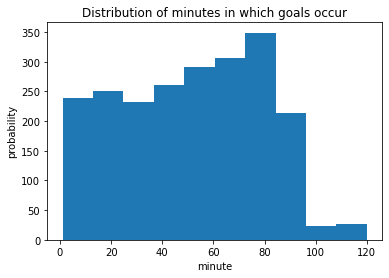

In [53]:
plt.hist(players['Event'].fillna("").map(min_goals).sum())
plt.ylabel('probability')
plt.xlabel('minute')
plt.title('Distribution of minutes in which goals occur')

## Numbers Of Goals

In [27]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [28]:
homeGoals = matches[['Home Team Name','Home Team Goals']].dropna()
awayGoals = matches[['Away Team Name','Away Team Goals']].dropna()

In [29]:
homeGoals.columns = ['Countries','Goals']
awayGoals.columns = ['Countries','Goals']

In [30]:
goals = homeGoals.append(awayGoals,ignore_index=True)

<ipython-input-30-e9538dc078d7>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [32]:
goals = goals.sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [33]:
goals[:15].iplot(kind='bar',xTitle = 'Country Names',yTitle='Goals',title='Goals Of Every Country')

## Number Of Attendance

In [34]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [40]:
# world_cups['Attendance'] = world_cups['Attendance'].str.replace(".","")
world_cups['Attendance'] = world_cups['Attendance'].astype(int)

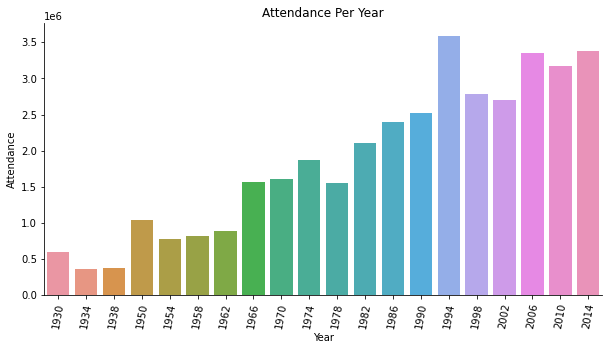

In [41]:
fig, ax = plt.subplots(figsize= (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year',y = 'Attendance', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')
plt.show()


## Number Of Qualified Teams

In [42]:
world_cups.head(0)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


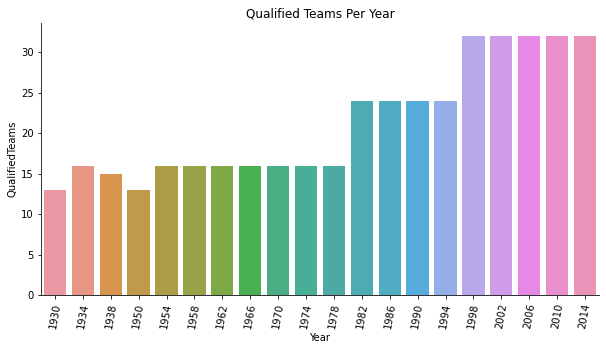

In [43]:
fig, ax = plt.subplots(figsize= (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year',y = 'QualifiedTeams', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')
plt.show()

## Number Of Goals Per Year

In [44]:
world_cups.head(0)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


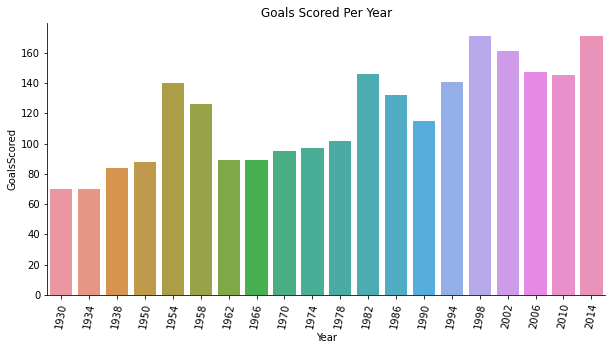

In [45]:
fig, ax = plt.subplots(figsize= (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year',y = 'GoalsScored', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored Per Year')
plt.show()

## Number Of Matches That Played

In [46]:
world_cups.head(0)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


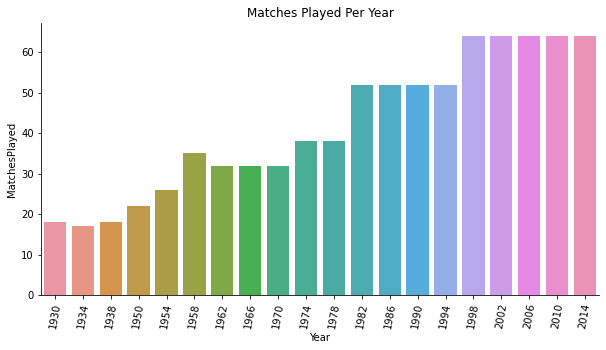

In [47]:
fig, ax = plt.subplots(figsize= (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year',y = 'MatchesPlayed', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played Per Year')
plt.show()

## Goals Per Team Per Word Cup

In [48]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [49]:
homeTeam = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
homeTeam

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [50]:
awayTeam = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
awayTeam

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [51]:
goals = pd.concat([homeTeam,awayTeam],axis=1)
goals.fillna(0,inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels=['Home Team Goals','Away Team Goals'],axis=1).astype(int)
goals

Goals
Year                   
1930.0 Argentina     18
       Brazil         5
       Chile          5
       France         4
       Paraguay       1
...                 ...
1998.0 Iran           2
       Mexico         8
       Norway         5
       Tunisia        1
2006.0 IR Iran        0

[427 rows x 1 columns]

In [52]:
goals = goals.reset_index()

In [53]:
goals.columns = ['Year','Country','Goals']
goals = goals.sort_values(by = ['Year','Goals'],ascending=[True,False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18
7,1930.0,Uruguay,15
6,1930.0,USA,7
8,1930.0,Yugoslavia,7
1,1930.0,Brazil,5
...,...,...,...
355,2014.0,Japan,2
361,2014.0,Russia,2
340,2014.0,Cameroon,1
352,2014.0,Honduras,1


In [54]:
top5G = goals.groupby('Year').head(5)
top5G.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18
7,1930.0,Uruguay,15
6,1930.0,USA,7
8,1930.0,Yugoslavia,7
1,1930.0,Brazil,5
13,1934.0,Italy,12
11,1934.0,Germany,11
10,1934.0,Czechoslovakia,9
9,1934.0,Austria,7
12,1934.0,Hungary,5


In [55]:
import plotly.graph_objects as go

In [56]:
x,y = goals['Year'].values,goals['Goals'].values

In [57]:
data=[]
for team in top5G['Country'].drop_duplicates().values:
    year = top5G[top5G['Country']== team]['Year']
    goal = top5G[top5G['Country']== team]['Goals']
    
    data.append(go.Bar(x = year , y = goal ,name = team))

layout = go.Layout(barmode = 'stack',title ='Top Five Teams With Most Goals',showlegend = False)
fig = go.Figure(data = data , layout = layout)
fig.show()

## Matches With Highest Number Of Attendance

In [58]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [59]:
matches['DataTime'] = pd.to_datetime(matches['Datetime'], errors='coerce').dt.strftime('%d-%m-%Y')
# matches['Datatime'] = matches['Datatime'].apply(lambda x : x.strftime('%d %b, %Y'))
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,DataTime
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,13-07-1930
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,13-07-1930
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,14-07-1930


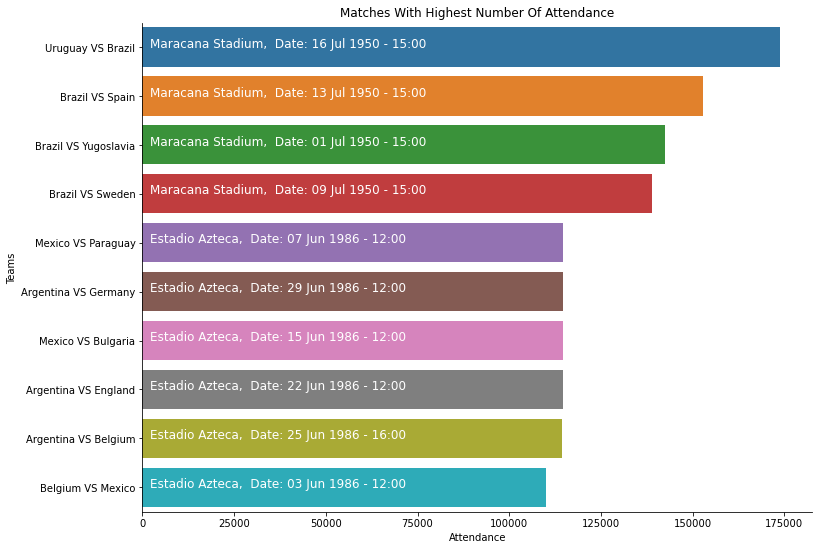

In [60]:
top10M = matches.sort_values(by = 'Attendance',ascending = False)[:10]
top10M['VS'] = top10M['Home Team Name'] + " VS " + top10M['Away Team Name'] 
plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10M['VS'],x = top10M['Attendance'])
sns.despine(right = True) 

plt.ylabel('Teams')
plt.xlabel('Attendance')
plt.title('Matches With Highest Number Of Attendance')


for i ,s in enumerate(top10M['Stadium'] + ",  Date: " + top10M['Datetime']):
    ax.text(2000,i,s,fontsize = 12,color = 'white')
plt.show()

## Stadiums With Highest AVG Attendance

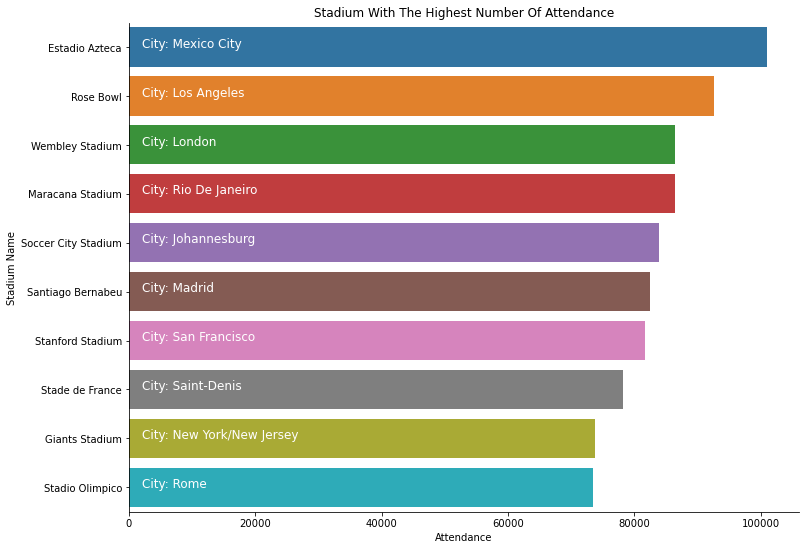

In [61]:
matches['Year'] = matches['Year'].astype(int)
STD = matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by='Attendance',ascending=False)
top10S=STD[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10S['Stadium'],x = top10S['Attendance'])
sns.despine(right = True) 

plt.ylabel('Stadium Name')
plt.xlabel('Attendance')
plt.title('Stadium With The Highest Number Of Attendance')


for i ,s in enumerate("City: " + top10S['City']):
    ax.text(2000,i,s,fontsize = 12,color = 'white')
plt.show()

In [62]:
matches['City'].value_counts()[:20].iplot(kind='bar')

## Home Team VS Away Team

In [63]:
def func(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return "Home Team Win"
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return "Away Team Win"
    return "Draw"

In [64]:
matches['OutComes'] = matches.apply(lambda x: func(x), axis=1)
matches.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,DataTime,OutComes
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,13-07-1930,Home Team Win
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,13-07-1930,Home Team Win
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,14-07-1930,Home Team Win
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,14-07-1930,Home Team Win
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,15-07-1930,Home Team Win


In [65]:

mat = matches['OutComes'].value_counts()
mat

Home Team Win    488
Draw             190
Away Team Win    174
Name: OutComes, dtype: int64

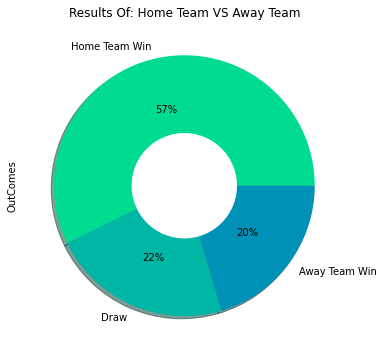

In [66]:
plt.figure(figsize = (6,6))
mat.plot.pie(autopct = '%1.0f%%',colors = sns.color_palette('winter_r'), shadow = True)
c = plt.Circle((0,0),0.4,color = 'white')
plt.gca().add_artist(c)
plt.title('Results Of: Home Team VS Away Team')
plt.show()

In [1]:
#convert to slide show 
#!jupyter nbconvert fifa_world_club.ipynb --to slides --post serve  --no-input --no-prompt